<a href="https://colab.research.google.com/github/Herrera00/CIENCIA-DATOS-2025/blob/main/Tarea_27_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis exploratorio de datos EDA
Conjunto de tecnicas estadisticas cuyo objetivo es explorar, describbir y resumir la naturaleza de los datos y comprender la relaciones existentes entre las variables de interes utilizando la comprencion del conjunto de datos.

##pasos del eda
1. **realizar un analisis descriptivo de las variables**
2. **re-ajustar tipo de variable que no sean consistentes en el momento de realizar las operaciones**
3. **detectar y tratar datos ausentes (NaN) que nos permitira procesar adecuadamente variables numericas**
4. **identificar datos atipicos y tratarlos de forma adecuda**. esto mitigara la distorsion de futuos analisis estadisticos
5. **realizar un examen mnumerico y grafico de las relaciones**


PREGUNTA OBJETIVO:

**¿JACK SE SALVABA SI ROSE LE HUBIERA HECHO CAMPITO?**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv ("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#**Diccionario**
**PassengerId:** numero identidentificación del pasajero

**Survived:** 1 sobrevivio; 0 murio

**Pclass:** Clase de tiquete que tenia el pasajero (1,2,3)

**Name:** Nombre del pasajero

**Sex:** Genero Male/Female

**Age:** Edad

**SibSp:** Numero de Hermanos o esposas en el barco

**Parch:** Numero de padres o hijos

**Ticket:** Id del tiquete

**Fare:** Valor del tiquete

**Cabin:** Numero de la habitación

**Embarked:** Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton




#**1. Analisis descriptivo**

tomar cada una de las caracteristicas y analizarla

In [ ]:
def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df["Survived"]==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Survived','Fallecidos']
  test.plot(kind="bar",stacked=True,figsize=(10,5))

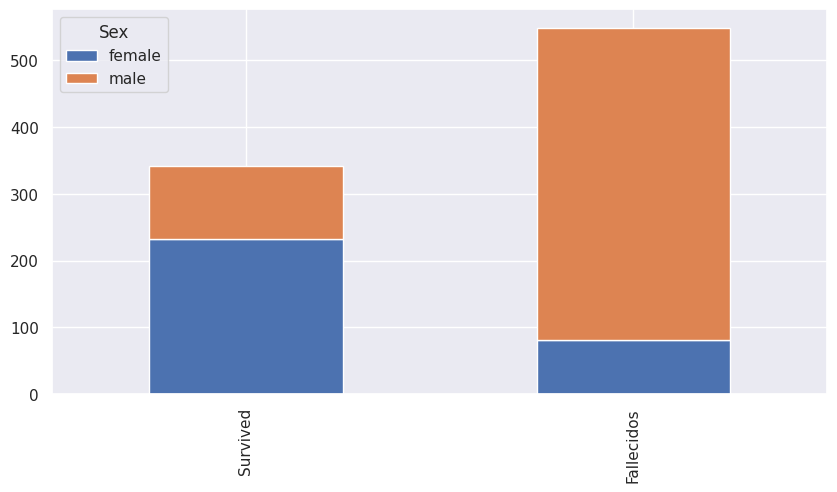

In [ ]:
bar_char("Sex")

##**Se observa como las mujeres tuvieron mayor probabilidad de supervivencia**

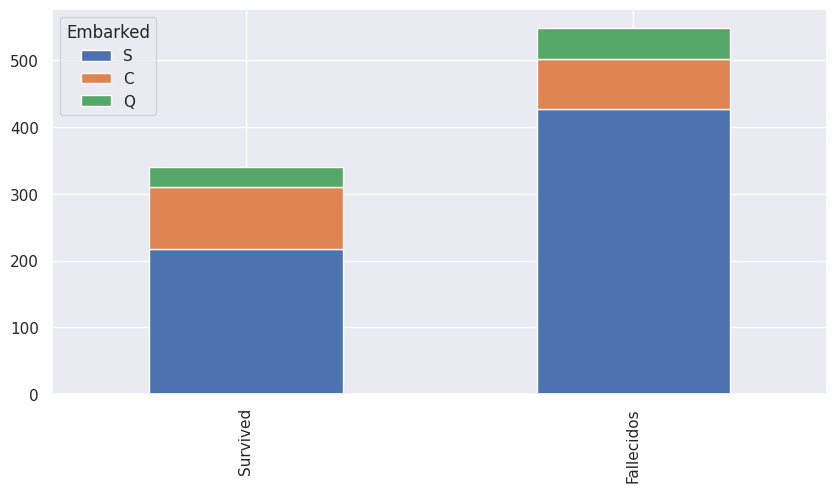

In [ ]:
bar_char("Embarked")

##**Se observa como los pasajeros que embarcaron en S tiene una tasa de supervivencia mas baja. Se observa como los pasajeros que embarcaron por Q tienen mayor probabilidad de sobrevivir**

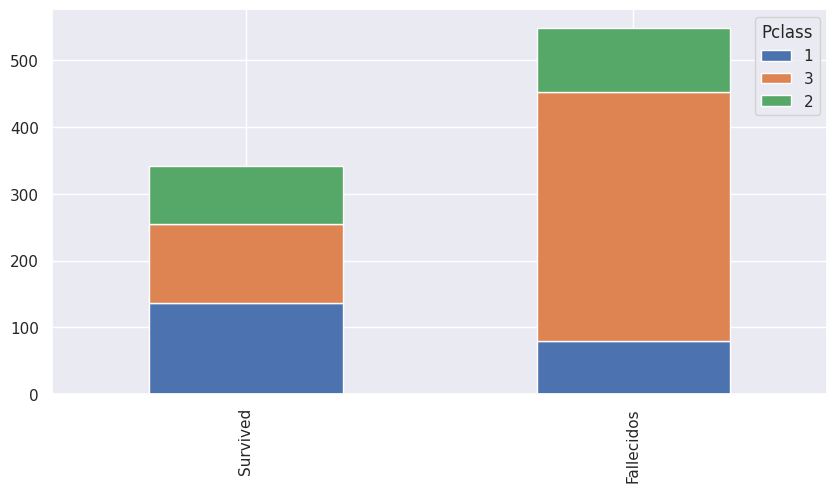

In [ ]:
bar_char("Pclass")

##**PClass1 tenian mayor probabilidad de sobrevivir que PClass 3**

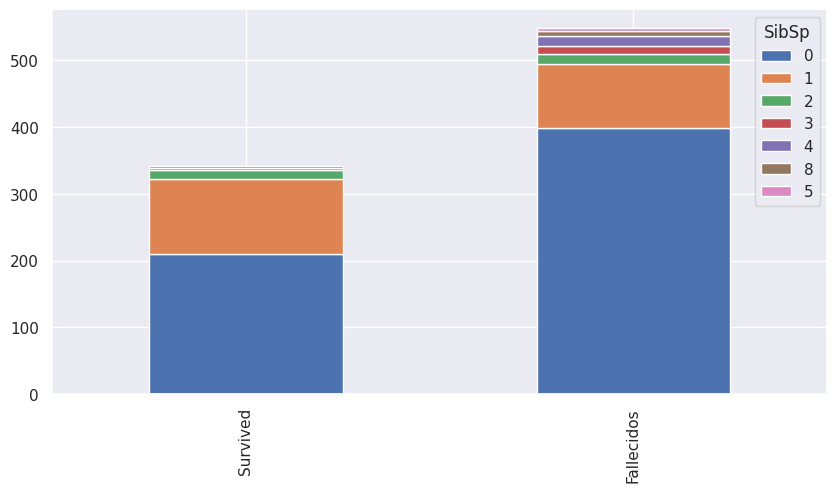

In [ ]:
bar_char("SibSp")

##**Se observa como las personas solteras tiene una menor probabilidad de sobrevivir que las que tienen hermanos o esposa**

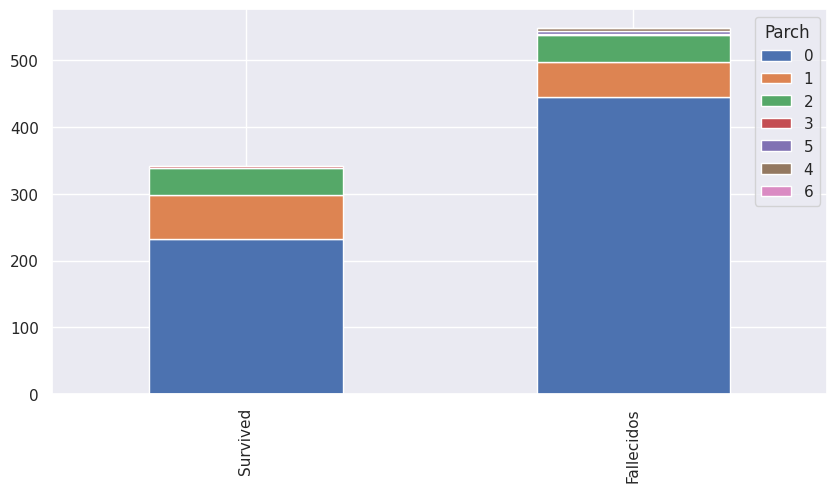

In [ ]:
bar_char("Parch")

##**Se observa como la probabilidad de sobrevivir aumenta si tenia 1 o hasta 3 hijos. Disminuia si tenia 0 o más de 3 hijos**

#**Ingenieria de caracteristicas**
Es el proceso de usar el dominio del conocmiento para crear nuevas caracteristicas (feature vectors) que logre que los algoritmos de machine learning funcionanen adecuadamente

#**2. creando feature vectors**

In [ ]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return titles


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2415557267.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)


In [ ]:
df["Title"]=extract_title(df)

In [ ]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


##**2.1 Creando un mapeo de titulos**

Para ello reemplazamos los titulos con los

**Mr=** 0

**Miss=** 1

**Mrs=** 2

**Otros=** 3

In [ ]:
def replace_titles(data):
  title_mapping={"Mr":0,"Miss":1,"Mrs":2}
  data ["Title"]=data["Title"].map(title_mapping).fillna(3)
  return data

In [ ]:
replace_titles(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,3.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,3.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,3.0


In [ ]:
df[["Name","title"]].head()

,Name,title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


#**2.2 reparando la edad**

In [ ]:
title_age_means=df.groupby("title")["Age"].mean()
title_age_means

,Age
title,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167


In [ ]:
df["Age"]=df.apply(lambda row: title_age_means[row["title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)

In [ ]:
df[["title","Age"]].head(10)

,title,Age
0,Mr,22.00000
1,Mrs,38.00000
2,Miss,26.00000
3,Mrs,35.00000
4,Mr,35.00000
5,Mr,32.36809
6,Mr,54.00000
7,Master,2.00000
8,Mrs,27.00000
9,Mrs,14.00000


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


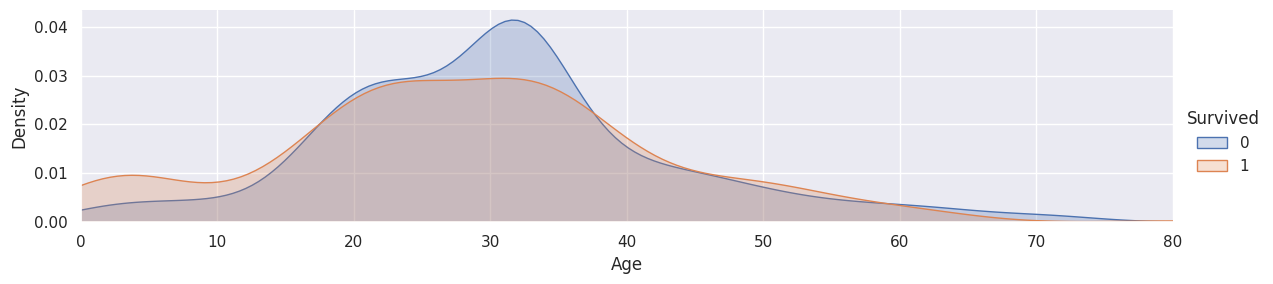

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


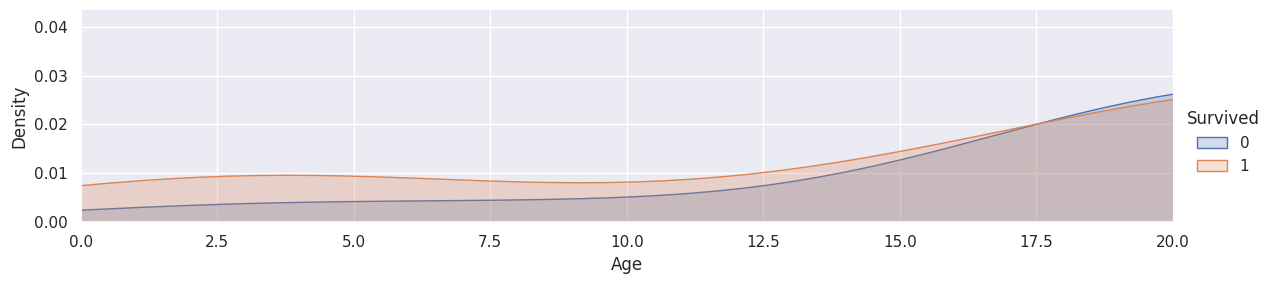

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


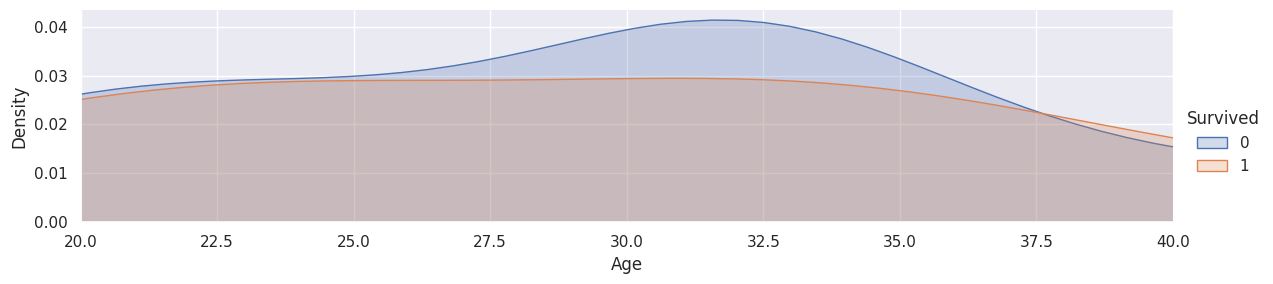

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(20,40)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


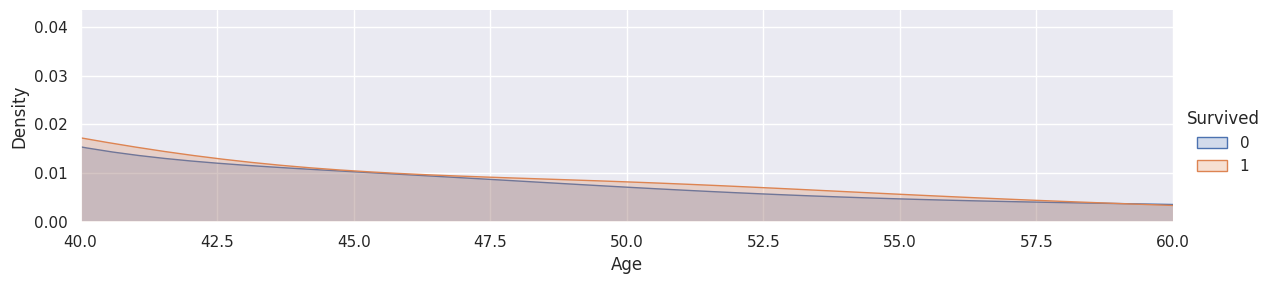

In [ ]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(40,60)
plt.show()

#**Binning**

Convertir una varibale numerica en categorica.

**Niños=**  0

**Joven=** 1

**Adulto=** 2

**Edad madura=** 3

**Edad avanzada=** 4

In [ ]:
df["Age_category"]=pd.cut(df["Age"], bins=[0,16,26,36,62,float("inf")],labels=[0,1,2,3,4],right=False)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Title,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr,3.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs,3.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Mrs,3.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Mr,3.0,2
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q,Mr,3.0,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,Mr,3.0,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,Master,3.0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,Mrs,3.0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,NaN,C,Mrs,3.0,0


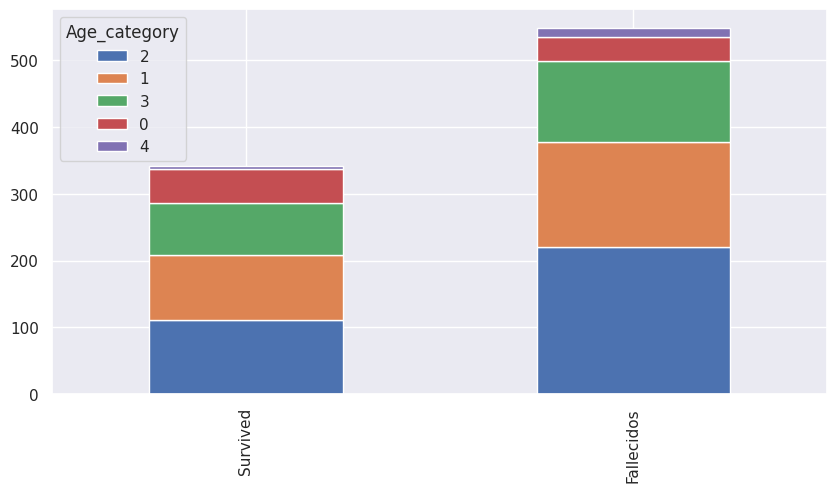

In [ ]:
bar_char("Age_category")

#**TAREA**
**1. Analisis Fare**

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Valores nulos en Fare: 0


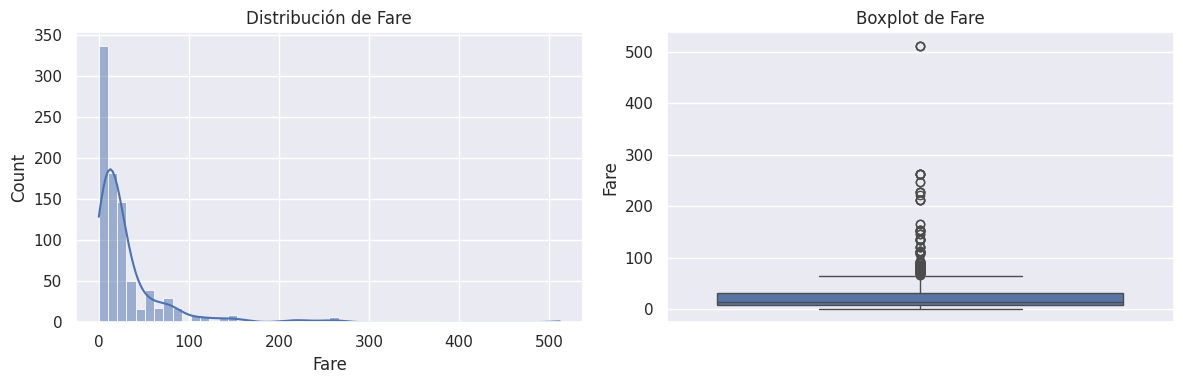

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


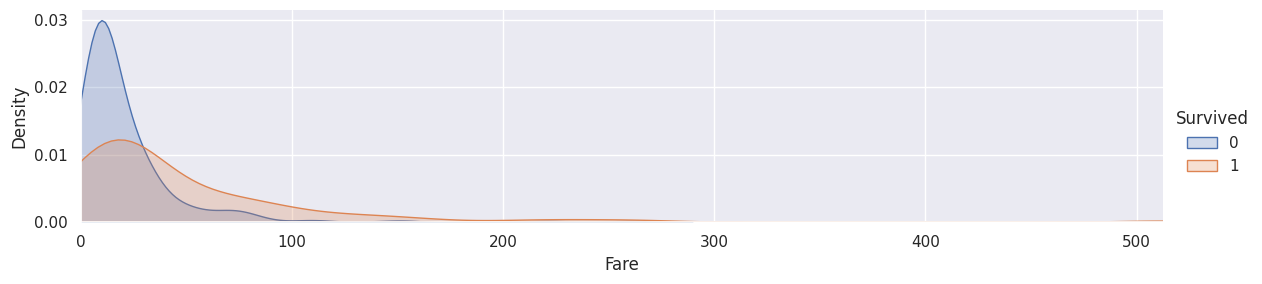


Fare promedio por supervivencia:
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [ ]:
# Explorar estadísticas básicas de Fare
print(df['Fare'].describe())
print("\nValores nulos en Fare:", df['Fare'].isnull().sum())

# Visualizar distribución de Fare
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Fare', bins=50, kde=True)
plt.title('Distribución de Fare')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Fare')
plt.title('Boxplot de Fare')
plt.tight_layout()
plt.show()

# Análisis de Fare por supervivencia
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.show()

# Estadísticas por grupo de supervivencia
print("\nFare promedio por supervivencia:")
print(df.groupby('Survived')['Fare'].mean())

#**1.** Se observa como la variable "Fare" esta sesgada a la derecha. La mayoria de pasajeros pago tarifas muy bajas. Por lo que la concentracion en tarifas economicas coincide con el pico de densidad mas alto del grupo que no sobrevivio

#**2.** Se observa que existe una correlacion positiva entre la tarifa y la superviviencia. 48.39 fue el precio promedio por los superviivientes; mientras que la de los no sobrevivientges era de 22.11.

#**2.Binning**

Fare_category
Medio       224
Bajo        223
Alto        222
Muy Alto    222
Name: count, dtype: int64


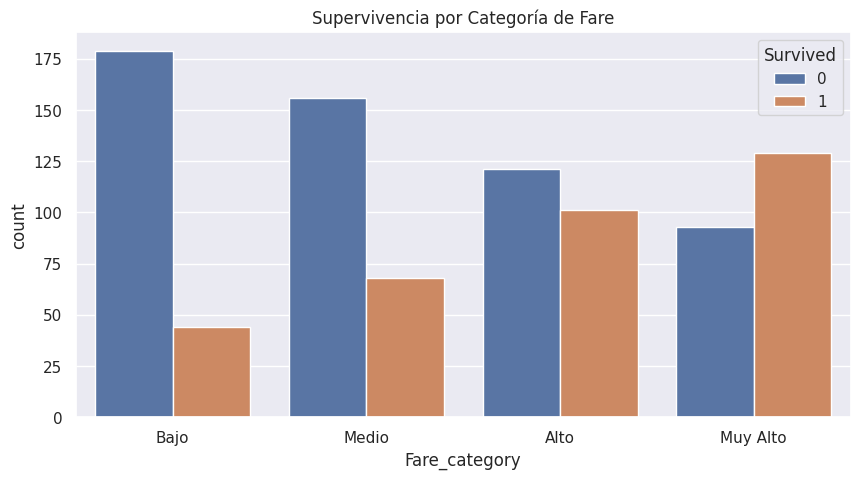


Tasa de supervivencia por categoría de Fare:
Fare_category
Bajo        0.197309
Medio       0.303571
Alto        0.454955
Muy Alto    0.581081
Name: Survived, dtype: float64


/tmp/ipython-input-722363901.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('Fare_category')['Survived'].mean()


In [ ]:
# Opción 1: Binning por cuartiles
df['Fare_category'] = pd.qcut(df['Fare'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Opción 2: Binning manual (basado en la distribución del Titanic)
# bins = [0, 7.91, 14.45, 31, float('inf')]
# df['Fare_category'] = pd.cut(df['Fare'], bins=bins, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Ver distribución
print(df['Fare_category'].value_counts())

# Visualizar Fare_category vs Survived
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Fare_category', hue='Survived')
plt.title('Supervivencia por Categoría de Fare')
plt.show()

# Tasa de supervivencia por categoría
fare_survival = df.groupby('Fare_category')['Survived'].mean()
print("\nTasa de supervivencia por categoría de Fare:")
print(fare_survival)

#**3.Embarked**

Valores en Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Valores nulos en Embarked: 2


/tmp/ipython-input-3384355713.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


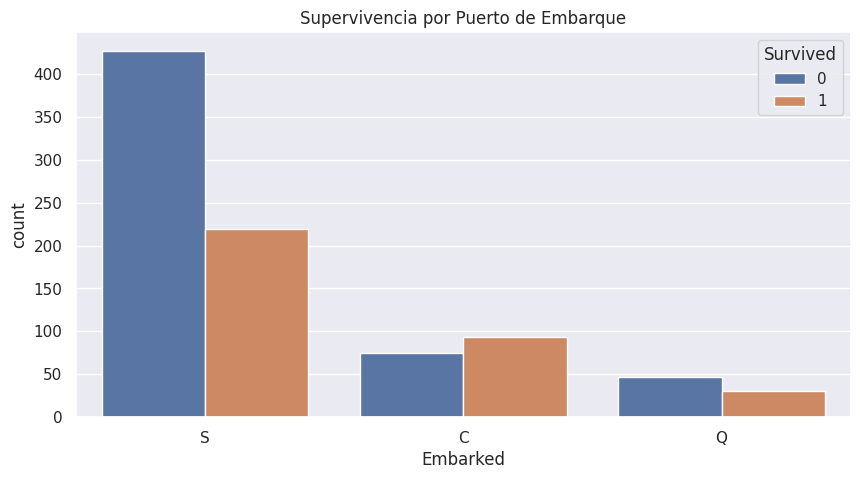


Tasa de supervivencia por puerto:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [ ]:
# Explorar valores en Embarked
print("Valores en Embarked:")
print(df['Embarked'].value_counts())
print("\nValores nulos en Embarked:", df['Embarked'].isnull().sum())

# Rellenar valores nulos con la moda (más frecuente)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Visualizar Embarked vs Survived
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Supervivencia por Puerto de Embarque')
plt.show()

# Tasa de supervivencia por puerto
embarked_survival = df.groupby('Embarked')['Survived'].mean()
print("\nTasa de supervivencia por puerto:")
print(embarked_survival)

#**1.** Se observa como el puerto de embarque esta fuertemente relacionando con la superviviencia
#**2.** Se observa que la mayoria de los pasajeros embarco por "S"; este grupo presento la tasa de superviviencia mas baja. Por otro lado los pasajeros que embarcaron por "C" tuvieron la tasa de superviviencia mas alta.

Fare_category  Bajo  Medio  Alto  Muy Alto
Embarked                                  
C                34     18    42        74
Q                51      6    18         2
S               138    200   162       146

Fare promedio por puerto:
Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64


/tmp/ipython-input-1049267183.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Embarked', y='Fare', hue='Survived', ci=None)


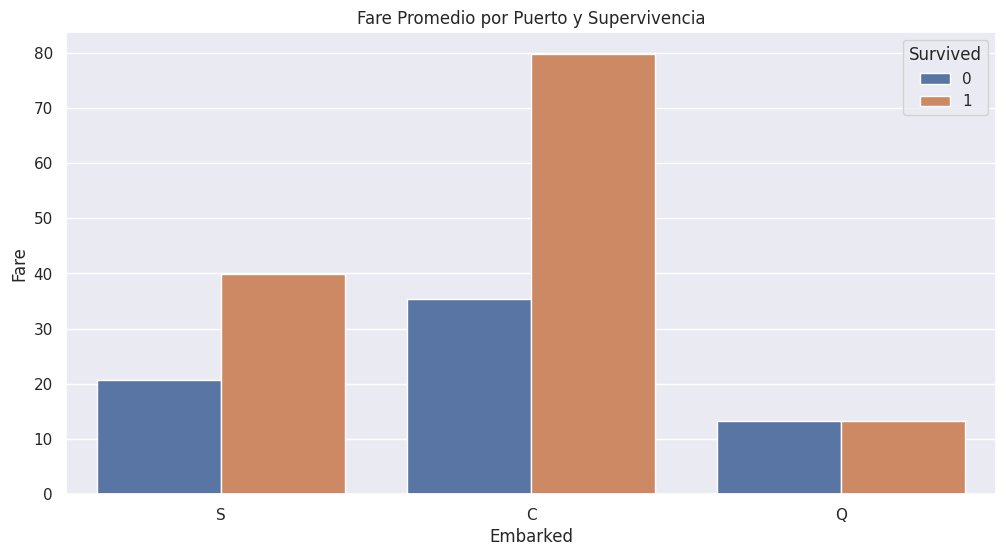

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

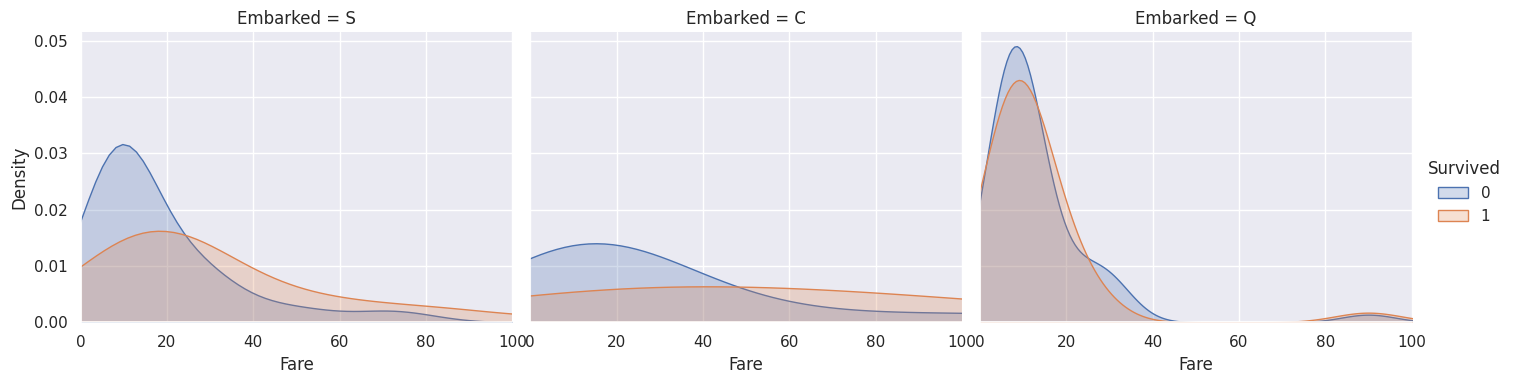

In [ ]:
# Crosstab de Embarked y Fare_category
print(pd.crosstab(df['Embarked'], df['Fare_category']))

# Fare promedio por puerto
print("\nFare promedio por puerto:")
print(df.groupby('Embarked')['Fare'].mean())

# Visualización combinada
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Embarked', y='Fare', hue='Survived', ci=None)
plt.title('Fare Promedio por Puerto y Supervivencia')
plt.show()

# Facet grid: Embarked vs Fare colored by Survived
g = sns.FacetGrid(df, col='Embarked', hue='Survived', height=4, aspect=1.2)
g.map(sns.kdeplot, 'Fare', shade=True)
g.add_legend()
g.set(xlim=(0, 100))
plt.show()

#**1.** La relacion entre tarifa y supervivencia cambia segun el puerto. En Cherbourg "C" y Southampton "S", los superviiventes pagaron tarifas mas altas que los no supervivientes
#**2.** Por otro lado Queenstown "Q", se caracterizo por tener una tarifa baja.Lo que sujiere que la tarifa no es un factor determinante para sobrevivir en el puerto "Q"

In [ ]:
# Feature: Fare por persona (considerando familia)
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Fare_per_person'] = df['Fare'] / df['Family_Size']

# Feature: ¿Viaja solo?
df['Is_Alone'] = (df['Family_Size'] == 1).astype(int)

# Feature: Combinación de Embarked y Pclass
df['Embarked_Pclass'] = df['Embarked'].astype(str) + '_' + df['Pclass'].astype(str)

# Feature: ¿Pagó tarifa alta?
df['High_Fare'] = (df['Fare'] > df['Fare'].median()).astype(int)

# Mostrar las nuevas features
print(df[['Fare', 'Family_Size', 'Fare_per_person', 'Is_Alone', 'High_Fare']].head(10))

      Fare  Family_Size  Fare_per_person  Is_Alone  High_Fare
0   7.2500            2          3.62500         0          0
1  71.2833            2         35.64165         0          1
2   7.9250            1          7.92500         1          0
3  53.1000            2         26.55000         0          1
4   8.0500            1          8.05000         1          0
5   8.4583            1          8.45830         1          0
6  51.8625            1         51.86250         1          1
7  21.0750            5          4.21500         0          1
8  11.1333            3          3.71110         0          0
9  30.0708            2         15.03540         0          1


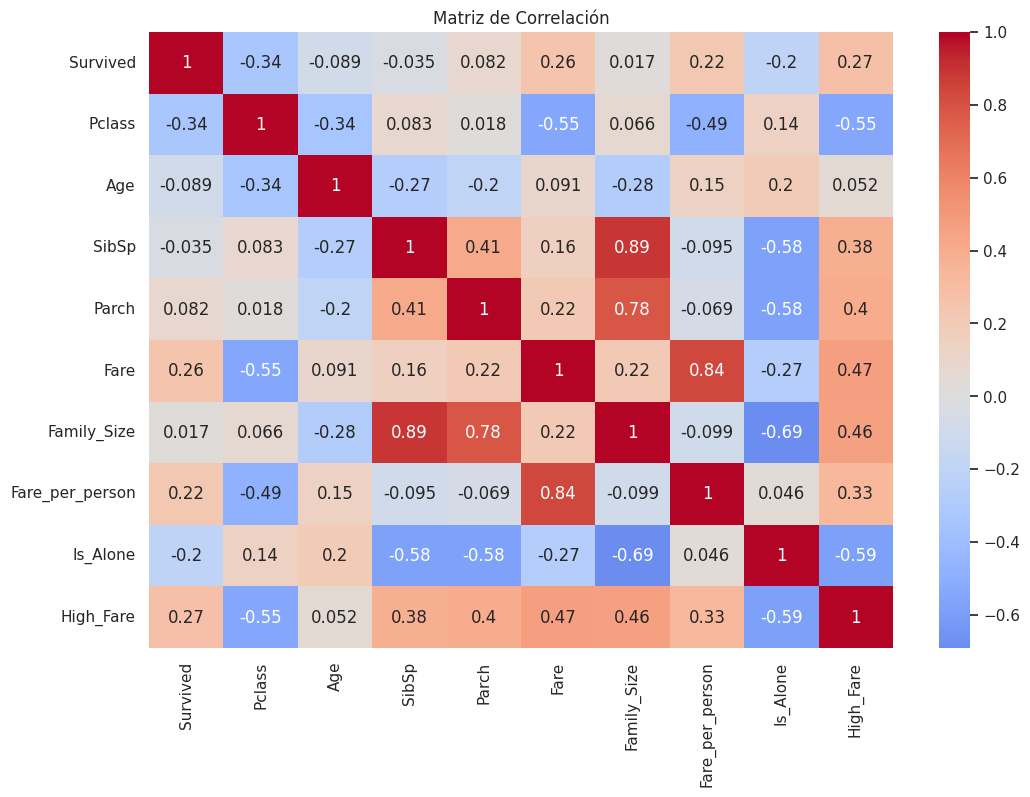

In [ ]:
# Matriz de correlación con las nuevas features
features_to_analyze = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
                       'Fare', 'Family_Size', 'Fare_per_person', 'Is_Alone', 'High_Fare']

plt.figure(figsize=(12, 8))
sns.heatmap(df[features_to_analyze].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()